# *Importing the required tools*

In [44]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import skimage.io
import skimage.color
import skimage.transform
import numpy as np
import scipy.ndimage
from matplotlib import pyplot as plt
from skimage.color.colorconv import rgba2rgb

# *Initializations*

In [46]:
# No of gaussians chosen are - 11
s = 5
k = 2 ** (1/(s - 1))
sigma = 1.6

In [47]:
#Initializing the lists for gaussians and Diff of gaussians\
#We are using only one octave

gaussians = [None] * s
DOGs = [None] * (s - 1)
Extremas = [None] * (s - 3)

# Function that returns Extremas from 3 DOGs

In [48]:
def find_extrema(below, middle, above, shape):
  
  #Dimensions of the image
  height = shape[0]
  width = shape[1]

  #Initialize an array of image's shape to store the extremas

  extrema_points = np.zeros([height, width])
  points = 0

  for i in range(1, height - 1):
        for j in range(1, width - 1):

          # 3 lists to store each layer's values

          middle_pixels = []
          above_pixels = []
          below_pixels = []

          #present value is stored and is check for minima or maxima

          present = middle[i,j]
          
          # Traversing through the surrounding pixels and storing in the respective lists

          for m in range(i - 1, i + 2):
            for n in range(j - 1, j + 2):
              if(m != i or  n != j):
                middle_pixels.append(middle[m,n])
              above_pixels.append(above[m,n])
              below_pixels.append(below[m,n])

          #Now we have lists containing all the surrounding pixels
          
          #Checking for maxima
          
          if(present > max(middle_pixels) and present > max(above_pixels) and present > max(below_pixels)):
            extrema_points[i,j] = 1
            points += 1
          
          #Checking for minimas

          elif(present < min(middle_pixels) and present < min(above_pixels) and present < min(below_pixels)):
            extrema_points[i,j] = 1
            points +=1
            
  return extrema_points, points

# *Function that plots the scale space extremas on an image*

In [49]:
def scale_space(image):
  
  Total_points = 0
  for i in range(s):
        gaussians[i] = scipy.ndimage.gaussian_filter(image, sigma * (k ** i)) * 255
  for i in range(s - 1):
        DOGs[i] = gaussians[i + 1] - gaussians[i]
  for i in range(s - 3):
    Extremas[i], points = find_extrema(DOGs[i].copy(), DOGs[i + 1].copy(), DOGs[i + 2].copy(),image.shape)
    print("No. of Extremas are:", points,'\n')
    
    #Plotting the extremas superposed on the image
  
    image = image + Extremas[i]
    plt.imshow(image, cmap = 'gray')
    plt.show()
  print('\n\n')
  

# *Loading the images from drive*

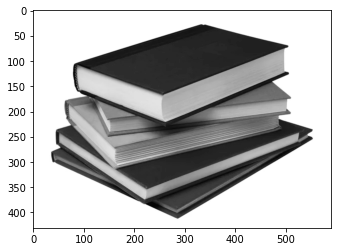

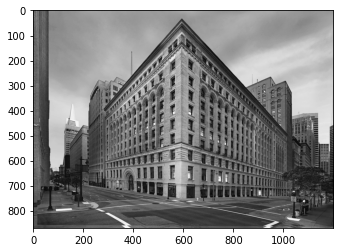

In [50]:
books = skimage.color.rgb2gray(rgba2rgb(skimage.io.imread('/content/drive/MyDrive/Data/books.png')))
building = skimage.color.rgb2gray(rgba2rgb(skimage.io.imread('/content/drive/MyDrive/Data/building.png')))
plt.imshow(books, cmap = 'gray')
plt.show()
plt.imshow(building, cmap = 'gray')
plt.show()

# *Scale Space Extremas of Normal Images*

No. of Extremas are: 268 



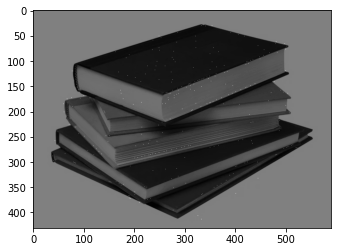

No. of Extremas are: 173 



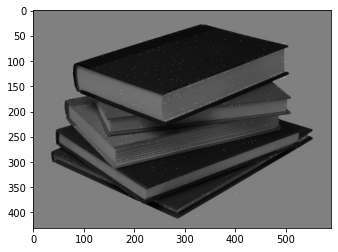




No. of Extremas are: 1634 



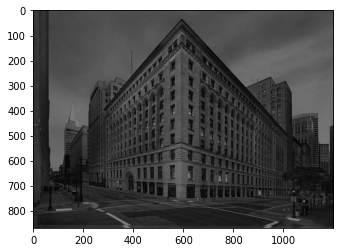

No. of Extremas are: 1173 



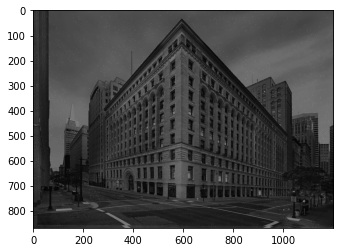

In [51]:
scale_space(books)
scale_space(building)

#*Rotation*

No. of Extremas are: 251 



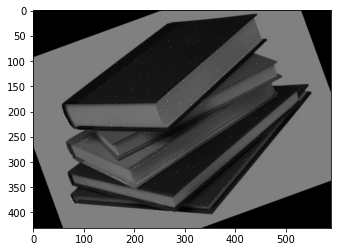

No. of Extremas are: 161 



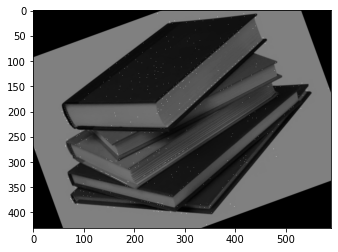




No. of Extremas are: 1677 



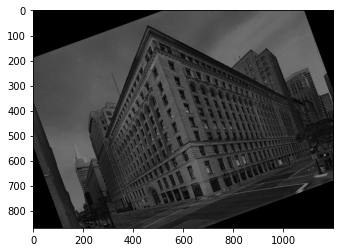

No. of Extremas are: 1259 



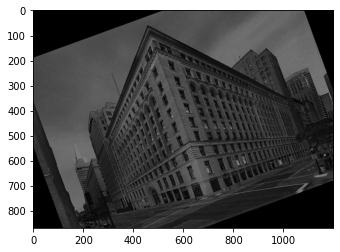

In [52]:
# Rotating by 20 degrees and detecting scale space extrema

books_rotate = skimage.transform.rotate(books, 20)
building_rotate = skimage.transform.rotate(building, 20)
scale_space(books_rotate)
scale_space(building_rotate)

No. of Extremas are: 423 



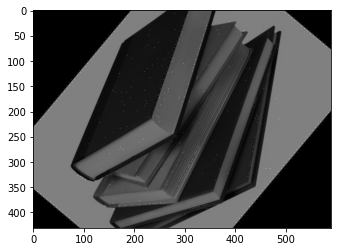

No. of Extremas are: 187 



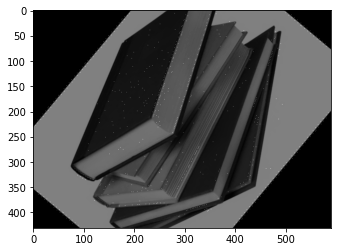




No. of Extremas are: 1621 



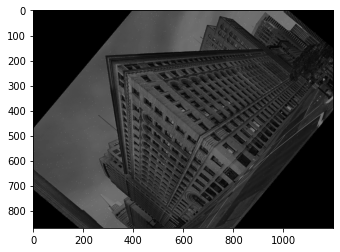

No. of Extremas are: 1050 



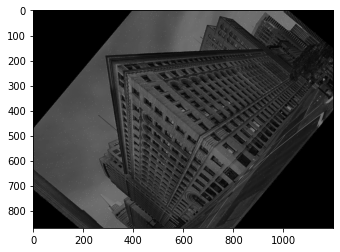

In [53]:
# Rotating by 50 degrees and detecting scale space extrema

books_rotate = skimage.transform.rotate(books, 50)
building_rotate = skimage.transform.rotate(building, 50)
scale_space(books_rotate)
scale_space(building_rotate)

# *Upscale*

No. of Extremas are: 1063 



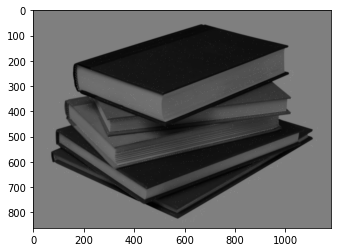

No. of Extremas are: 737 



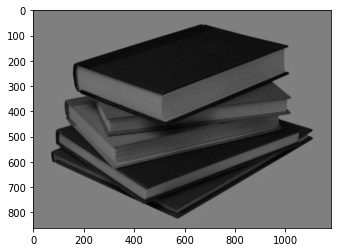




No. of Extremas are: 12998 



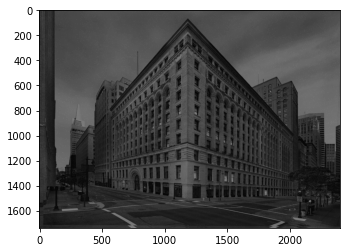

No. of Extremas are: 7406 



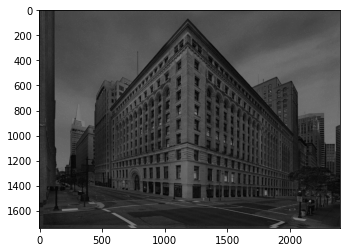

In [58]:
#Upscaling the Images

books_upscale = skimage.transform.rescale(books, 2, anti_aliasing=False)
building_upscale = skimage.transform.rescale(building, 2, anti_aliasing=False)
scale_space(books_upscale)
scale_space(building_upscale)

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Downscale*

No. of Extremas are: 147 



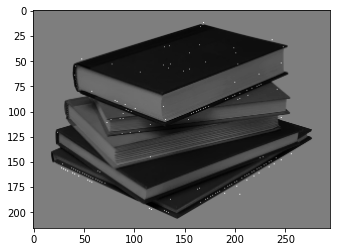

No. of Extremas are: 88 



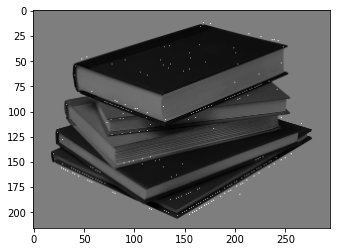




No. of Extremas are: 509 



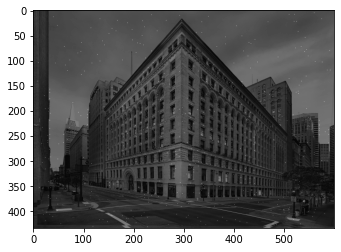

No. of Extremas are: 351 



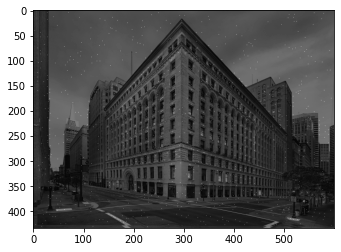

In [55]:
#Downscaling the Images

books_downscale = skimage.transform.rescale(books, 0.5, anti_aliasing=False)
building_downscale = skimage.transform.rescale(building, 0.5, anti_aliasing = False)
scale_space(books_downscale)
scale_space(building_downscale)

# *Gaussian Blur*

No. of Extremas are: 31 



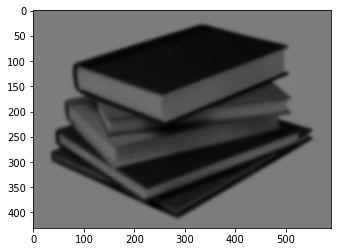

No. of Extremas are: 32 



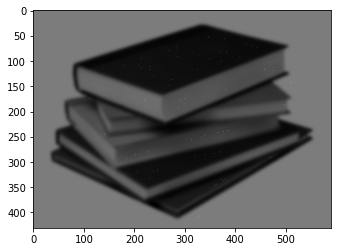




No. of Extremas are: 492 



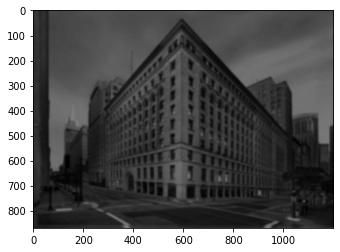

No. of Extremas are: 650 



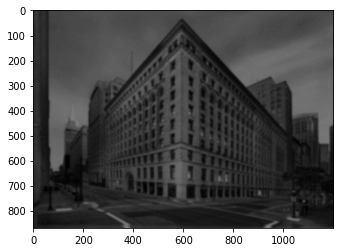

In [56]:
#Gaussian blur added to the images

books_blur = scipy.ndimage.gaussian_filter(books, 3)
building_blur = scipy.ndimage.gaussian_filter(building, 3)
scale_space(books_blur)
scale_space(building_blur)

# *Gaussian Noise*

No. of Extremas are: 221 



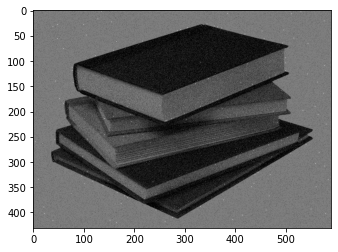

No. of Extremas are: 172 



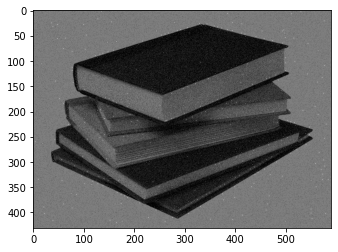




No. of Extremas are: 1134 



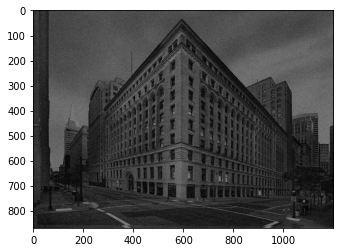

No. of Extremas are: 786 



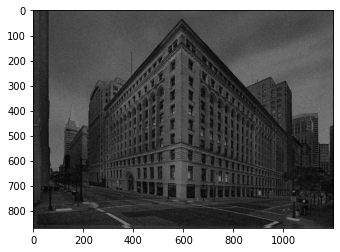

In [57]:
#Gaussian Noise added to the images

books_noise = skimage.util.random_noise(books, mode='gaussian')
building_noise = skimage.util.random_noise(building, mode='gaussian')
scale_space(books_noise)
scale_space(building_noise)